<a href="https://colab.research.google.com/github/jordantangy/MoviePosterClassification-CNN/blob/main/ConvNet%20Movie%20Poster%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
#import data set
!git clone https://github.com/jordantangy/Movie-Posters-Dataset.git

fatal: destination path 'Movie-Posters-Dataset' already exists and is not an empty directory.


In [3]:
data = pd.read_csv('/content/Movie-Posters-Dataset/Dataset/train.csv')
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


100%|██████████| 7254/7254 [00:35<00:00, 202.08it/s]


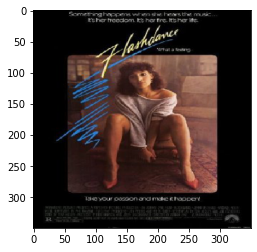

In [4]:
pic_width = 350
pic_height = 350
X = []
for i in tqdm(range(int(data.shape[0]))):
  path = '/content/Movie-Posters-Dataset/Dataset/Images/'+ data['Id'][i] +'.jpg'
  img = image.load_img(path, target_size=(pic_width,pic_height,3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)
plt.imshow(X[1])

In [5]:
#matrix y comes from the csv file, we just drop the column id and genre.
#So we have a matrix representing which genre each movie belongs to

y = data.drop(['Id','Genre'], axis = 1)
y = y.to_numpy()

#split training and testing data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)


## Building CNN 

In [6]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))


model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))


model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))


model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())



model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())



model.add(Dense(25, activation='sigmoid'))

### **Training the ConvNet**

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=2)

Epoch 1/5
2619/3083 [========================>.....] - ETA: 1:00 - loss: 0.3291 - accuracy: 0.2254

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 5)


In [ ]:
img = image.load_img('/content/the-legion.jpg', target_size=(pic_width,pic_height,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, pic_width, pic_height, 3)
classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)
y_prob
top3 = np.argsort(y_prob[0])[:-4:-1]
print(top3)